In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
#import kagglehub
#paultimothymooney_chest_xray_pneumonia_path = kagglehub.dataset_download('paultimothymooney/chest-xray-pneumonia')
#awsaf49_pneumonia_chest_xray_npy_path = kagglehub.dataset_download('awsaf49/pneumonia-chest-xray-npy')

#print('Data source import complete.')


# Import Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd
from tqdm import tqdm
from glob import glob
import os
import numpy as np

import matplotlib.pyplot as plt

#import tensorflow as tf


In [3]:
!pip install -U tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 75.4 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow

# Extrating files

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!ls /content/drive/MyDrive/pfc2T1


archive


In [6]:
import numpy as np

base_path = '/content/drive/MyDrive/pfc2T1/archive/Array128/Array128'
!ls '/content/drive/MyDrive/pfc2T1/Array128/Array128'
normal = np.load(f'{base_path}/train_Normal_128.npy')
viral = np.load(f'{base_path}/train_Virus_128.npy')
bacterial = np.load(f'{base_path}/train_bacteria_128.npy')


ls: cannot access '/content/drive/MyDrive/pfc2T1/Array128/Array128': No such file or directory


# Loading Training Files
I have converted all images to numpy array to boost speed

In [7]:
#normal = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/train_Normal_128.npy')
#viral = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/train_Virus_128.npy')
#bacterial = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/train_bacteria_128.npy')

In [8]:
normal.shape, viral.shape, bacterial.shape

((1341, 128, 128, 1), (1345, 128, 128, 1), (2530, 128, 128, 1))

# Create Labels

In [9]:
label_normal = np.zeros(len(normal))
label_bacterial = np.ones(len(bacterial))
label_viral = np.full(len(viral),2, dtype = int)

In [10]:
train_data = np.concatenate((normal,bacterial,viral),axis=0)
train_label = np.concatenate((label_normal,label_bacterial,label_viral),axis=0)

In [11]:
train_label.shape, train_data.shape

((5216,), (5216, 128, 128, 1))

# Visualization

## Normal

100%|██████████| 2/2 [00:00<00:00, 165.34it/s]


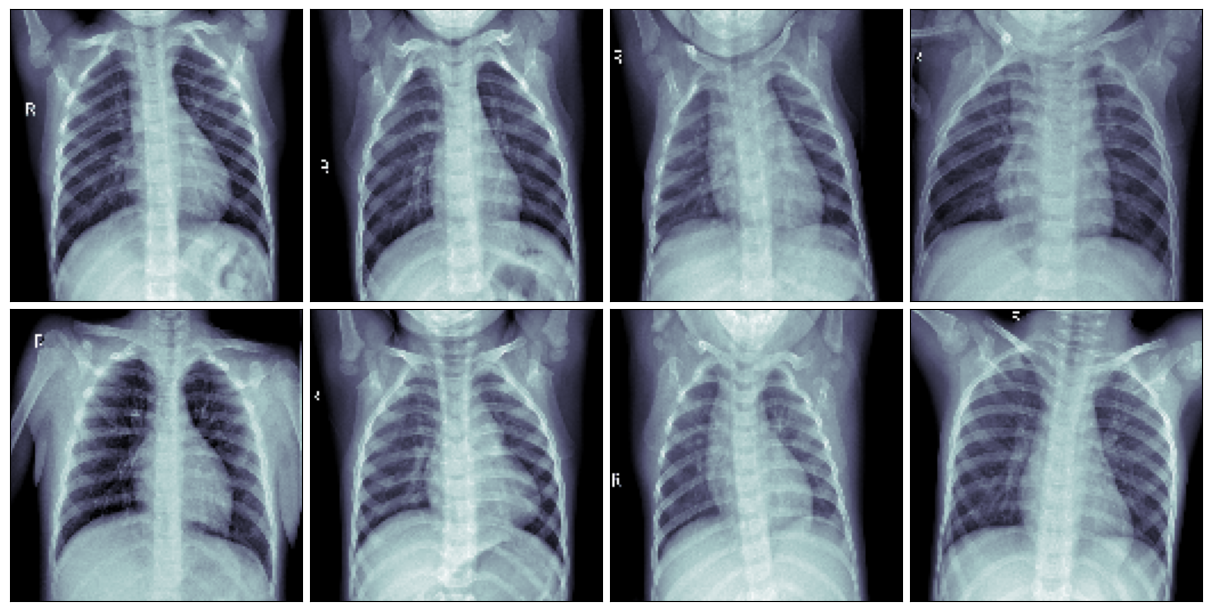

In [12]:
n_row = 2
n_col = 4

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):

    for col in range(n_col):

        ax[row][col].imshow(normal[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])

## Viral Pneumonia

100%|██████████| 2/2 [00:00<00:00, 146.58it/s]


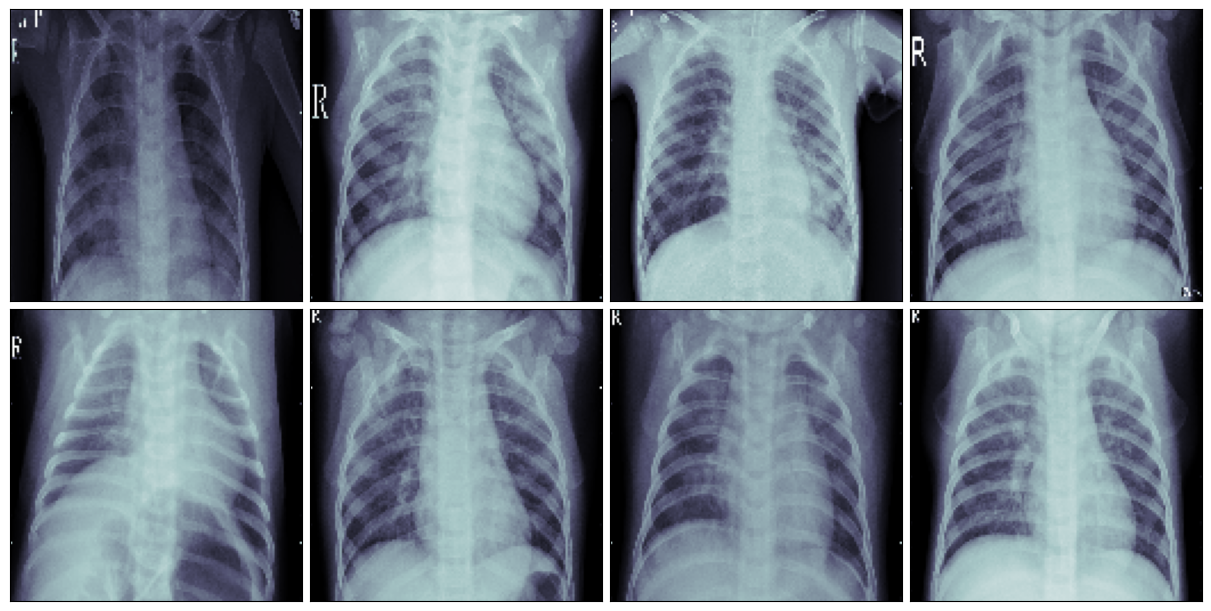

In [13]:
n_row = 2
n_col = 4

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):

    for col in range(n_col):

        ax[row][col].imshow(viral[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])

## Bacterial Pneumonia

100%|██████████| 2/2 [00:00<00:00, 265.87it/s]


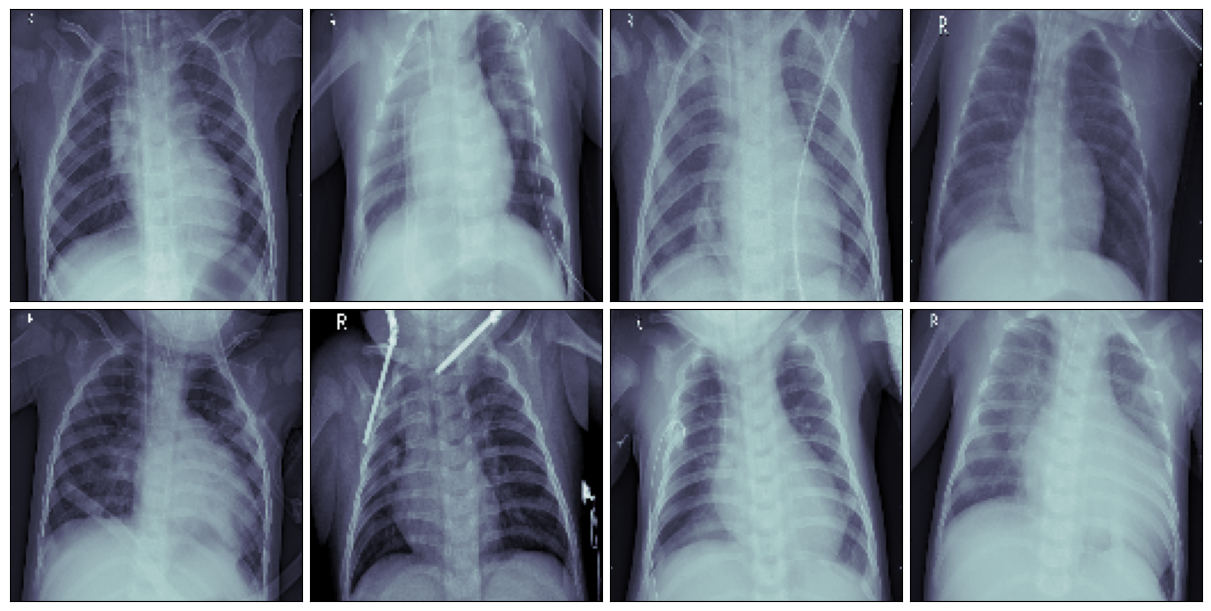

In [14]:
n_row = 2
n_col = 4

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):

    for col in range(n_col):

        ax[row][col].imshow(bacterial[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])

# Loading Test Data

In [15]:
#test_normal = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_Normal_128.npy')
#test_viral = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_Virus_128.npy')
#test_bacterial = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_bacteria_128.npy')

In [16]:
test_normal = np.load(f'{base_path}/test_Normal_128.npy')
test_viral = np.load(f'{base_path}/test_Virus_128.npy')
test_bacterial = np.load(f'{base_path}/test_bacteria_128.npy')


In [17]:
test_normal.shape, test_viral.shape , test_bacterial.shape

((234, 128, 128, 1), (148, 128, 128, 1), (242, 128, 128, 1))

# Create Labels

In [18]:
label_test_normal = np.zeros(len(test_normal))
label_test_bacterial = np.ones(len(test_bacterial))
label_test_viral = np.full(len(test_viral),2, dtype = int)

In [19]:
test_data = np.concatenate((test_normal, test_bacterial, test_viral),axis=0)
test_label = np.concatenate((label_test_normal,label_test_bacterial,label_test_viral),axis=0)

In [20]:
test_label.shape, test_data.shape

((624,), (624, 128, 128, 1))

# Visualization

## Normal

100%|██████████| 2/2 [00:00<00:00, 205.41it/s]


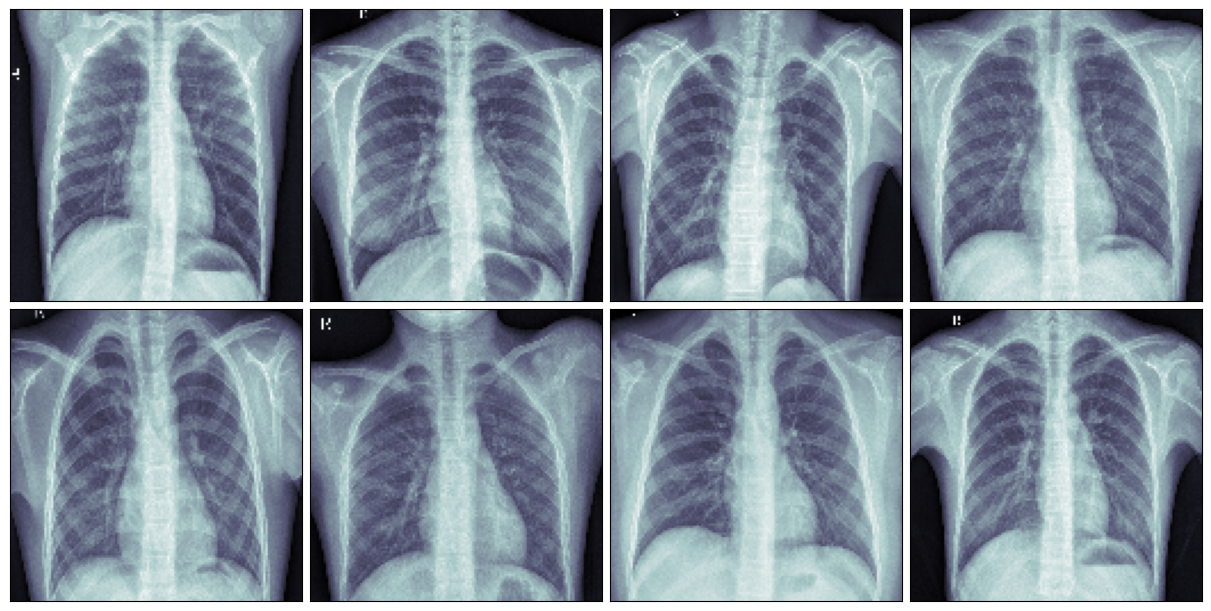

In [21]:
n_row = 2
n_col = 4

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):

    for col in range(n_col):

        ax[row][col].imshow(test_normal[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])

## Viral Pneumonia

100%|██████████| 2/2 [00:00<00:00, 252.11it/s]


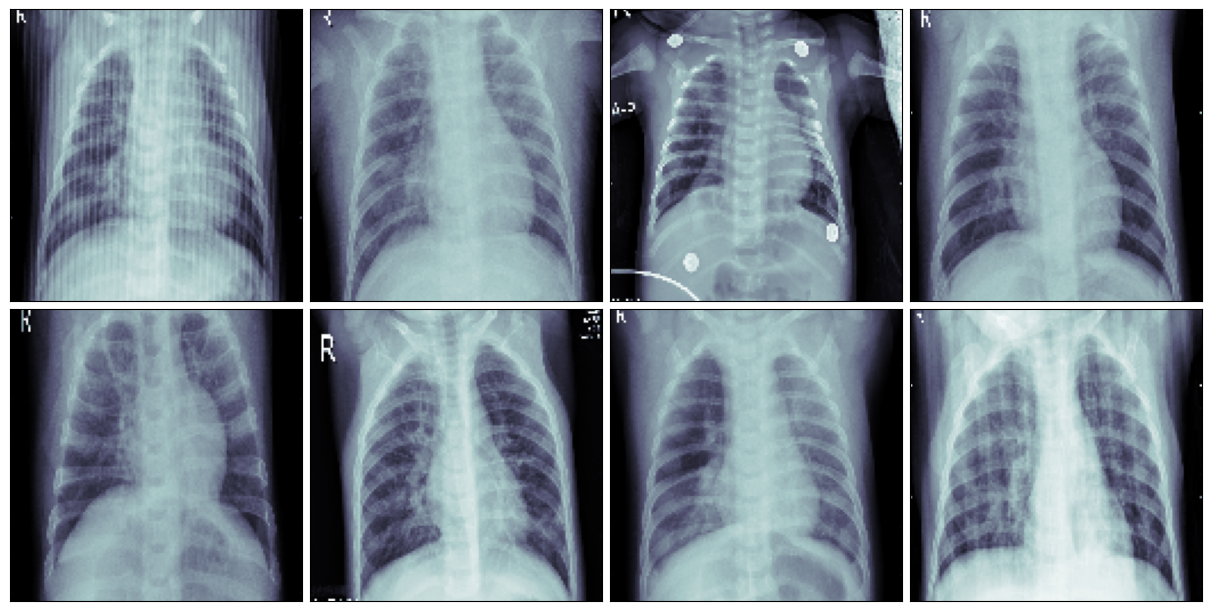

In [22]:
n_row = 2
n_col = 4

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):

    for col in range(n_col):

        ax[row][col].imshow(test_viral[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])

## Bacterial Pneumonia

100%|██████████| 2/2 [00:00<00:00, 313.29it/s]


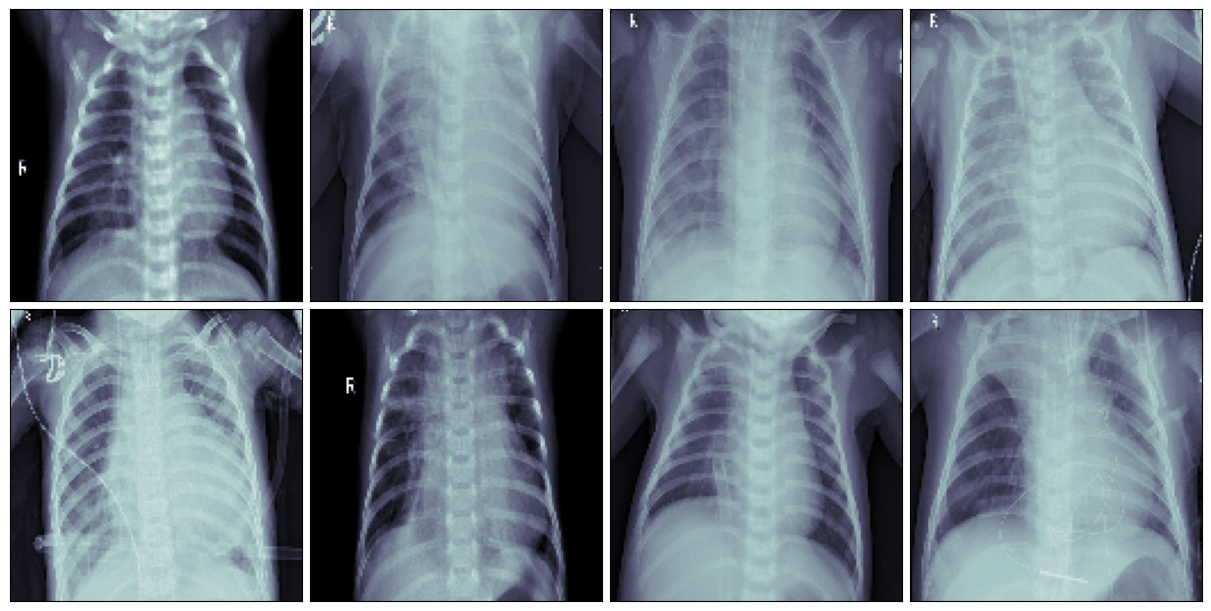

In [23]:
n_row = 2
n_col = 4

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):

    for col in range(n_col):

        ax[row][col].imshow(test_bacterial[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])

# Class Imbalance

In [24]:
# from sklearn.utils import class_weight

# class_weights = class_weight.compute_class_weight('balanced',
#                                                   np.unique(train_label),
#                                                   train_label)
# class_weights

# [CovXNet](https://www.sciencedirect.com/science/article/pii/S0010482520302250)

Title: CovXNet:  A multi-dilation convolutional neural network for automatic COVID-19 and other pneumonia detection from chest X-ray images with transferable multi-receptive feature optimization

Code: [here](https://github.com/Perceptron21/CovXNet)

## Residual & Shifter Unit:
![Residual & Shifter Unit](https://ars.els-cdn.com/content/image/1-s2.0-S0010482520302250-gr2.jpg)

## Model:
![Model](https://ars.els-cdn.com/content/image/1-s2.0-S0010482520302250-gr4.jpg)


# CovXNet128

In [25]:
!pip install -q covxnet --no-deps

In [26]:
from covxnet import CovXNet128

model = CovXNet128(input_shape = (128, 128, 1), num_classes = 3)
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
# model.summary()
# plot_model(model, show_shapes=True)

# One Hot Encoding the labels

In [27]:
from tensorflow.keras.utils import to_categorical
train_label = to_categorical(train_label, num_classes= 3)
test_label  = to_categorical(test_label, num_classes = 3)

# ImageDataGenerator

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale = 1/255,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1,
                                  fill_mode = 'constant',
                                  zoom_range = 0.2,
                                  rotation_range = 30)

val_datagen = ImageDataGenerator(rescale = 1/255)

train_ds = train_datagen.flow(train_data,
                                     train_label,
                                     batch_size = 16,
                                     shuffle = True)

val_ds = val_datagen.flow(test_data,
                                 test_label,
                                 batch_size = 16,
                                 shuffle = False)

# Vizualization After Augmentation

In [29]:
#images, labels = train_ds.next()
images, labels = next(train_ds)


100%|██████████| 2/2 [00:00<00:00, 242.25it/s]


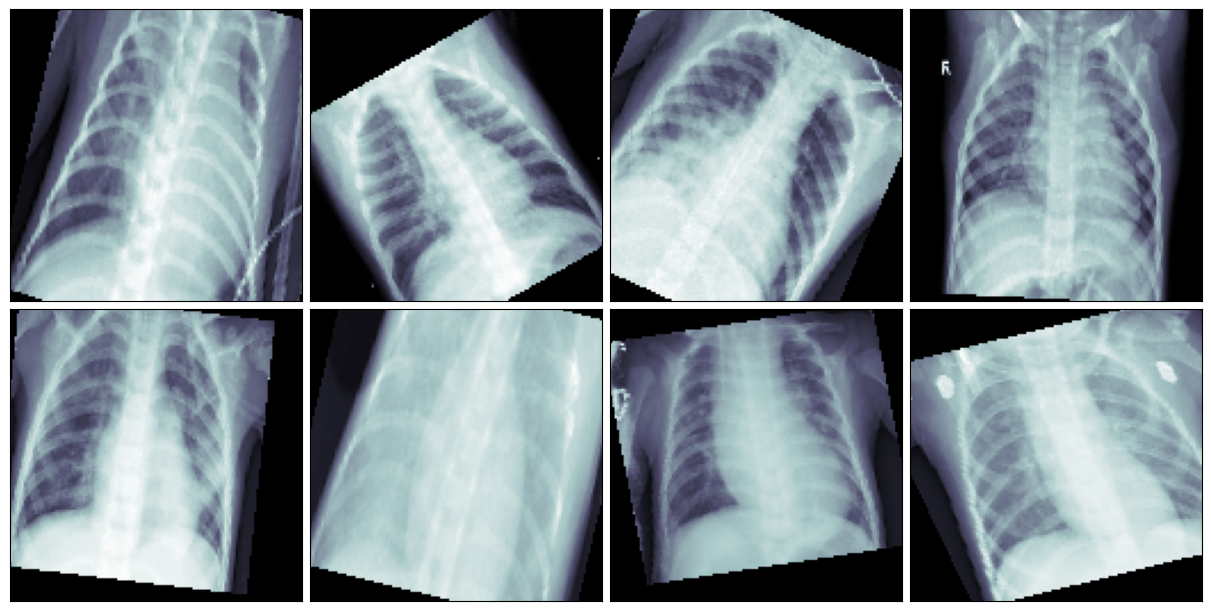

In [30]:
n_row = 2
n_col = 4

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):

    for col in range(n_col):

        ax[row][col].imshow(images[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])

# Callback

In [31]:
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.models import load_model

def get_callbacks():

    filepath = 'covxnet128.h5'
    callback1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=0,
                                save_best_only=True, mode='max')
    callback2 = CSVLogger('covxnet128_log.csv')

    return [callback1 ,callback2]

# Training

In [32]:
history = model.fit(train_ds,
                  validation_data=val_ds,
                  epochs = 75,
                  callbacks = get_callbacks(),
                  verbose = 1
                  )

Epoch 1/75


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.5903 - loss: 0.8862

326/326 ━━━━━━━━━━━━━━━━━━━━ 236s 274ms/step - accuracy: 0.5904 - loss: 0.8860 - val_accuracy: 0.3878 - val_loss: 1.6510
Epoch 2/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 130s 241ms/step - accuracy: 0.6709 - loss: 0.7422 - val_accuracy: 0.3878 - val_loss: 2.2008
Epoch 3/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.6873 - loss: 0.7108

326/326 ━━━━━━━━━━━━━━━━━━━━ 80s 247ms/step - accuracy: 0.6873 - loss: 0.7108 - val_accuracy: 0.7660 - val_loss: 0.6052
Epoch 4/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 80s 244ms/step - accuracy: 0.7027 - loss: 0.6876 - val_accuracy: 0.6715 - val_loss: 0.8422
Epoch 5/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 0.6986 - loss: 0.6702

326/326 ━━━━━━━━━━━━━━━━━━━━ 81s 249ms/step - accuracy: 0.6986 - loss: 0.6702 - val_accuracy: 0.7965 - val_loss: 0.5735
Epoch 6/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 80s 245ms/step - accuracy: 0.7167 - loss: 0.6413 - val_accuracy: 0.7788 - val_loss: 0.6535
Epoch 7/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 79s 244ms/step - accuracy: 0.7230 - loss: 0.6230 - val_accuracy: 0.7772 - val_loss: 0.6792
Epoch 8/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 79s 242ms/step - accuracy: 0.7442 - loss: 0.6040 - val_accuracy: 0.7901 - val_loss: 0.5840
Epoch 9/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.7506 - loss: 0.5803

326/326 ━━━━━━━━━━━━━━━━━━━━ 83s 246ms/step - accuracy: 0.7506 - loss: 0.5803 - val_accuracy: 0.8093 - val_loss: 0.5864
Epoch 10/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 79s 241ms/step - accuracy: 0.7399 - loss: 0.5950 - val_accuracy: 0.7997 - val_loss: 0.6433
Epoch 11/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.7567 - loss: 0.5699

326/326 ━━━━━━━━━━━━━━━━━━━━ 80s 246ms/step - accuracy: 0.7567 - loss: 0.5699 - val_accuracy: 0.8301 - val_loss: 0.5696
Epoch 12/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 80s 246ms/step - accuracy: 0.7637 - loss: 0.5547 - val_accuracy: 0.8173 - val_loss: 0.6703
Epoch 13/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 80s 246ms/step - accuracy: 0.7711 - loss: 0.5418 - val_accuracy: 0.6923 - val_loss: 0.9204
Epoch 14/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 80s 246ms/step - accuracy: 0.7603 - loss: 0.5554 - val_accuracy: 0.7740 - val_loss: 0.5830
Epoch 15/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 83s 254ms/step - accuracy: 0.7639 - loss: 0.5476 - val_accuracy: 0.7965 - val_loss: 0.6319
Epoch 16/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 80s 246ms/step - accuracy: 0.7693 - loss: 0.5314 - val_accuracy: 0.7981 - val_loss: 0.6181
Epoch 17/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - accuracy: 0.7784 - loss: 0.5277

326/326 ━━━━━━━━━━━━━━━━━━━━ 82s 250ms/step - accuracy: 0.7784 - loss: 0.5277 - val_accuracy: 0.8349 - val_loss: 0.5040
Epoch 18/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - accuracy: 0.7723 - loss: 0.5318

326/326 ━━━━━━━━━━━━━━━━━━━━ 82s 251ms/step - accuracy: 0.7723 - loss: 0.5318 - val_accuracy: 0.8413 - val_loss: 0.5043
Epoch 19/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 83s 254ms/step - accuracy: 0.7788 - loss: 0.5098 - val_accuracy: 0.7179 - val_loss: 0.7969
Epoch 20/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 80s 246ms/step - accuracy: 0.7706 - loss: 0.5278 - val_accuracy: 0.8365 - val_loss: 0.5473
Epoch 21/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - accuracy: 0.7782 - loss: 0.5105

326/326 ━━━━━━━━━━━━━━━━━━━━ 82s 251ms/step - accuracy: 0.7783 - loss: 0.5105 - val_accuracy: 0.8558 - val_loss: 0.5237
Epoch 22/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 80s 245ms/step - accuracy: 0.7901 - loss: 0.4989 - val_accuracy: 0.8029 - val_loss: 0.6016
Epoch 23/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 80s 246ms/step - accuracy: 0.7781 - loss: 0.5199 - val_accuracy: 0.8157 - val_loss: 0.5175
Epoch 24/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 82s 245ms/step - accuracy: 0.7685 - loss: 0.5097 - val_accuracy: 0.8061 - val_loss: 0.5880
Epoch 25/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 80s 246ms/step - accuracy: 0.7828 - loss: 0.4959 - val_accuracy: 0.8285 - val_loss: 0.5194
Epoch 26/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 80s 246ms/step - accuracy: 0.7855 - loss: 0.4924 - val_accuracy: 0.8365 - val_loss: 0.5946
Epoch 27/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 80s 246ms/step - accuracy: 0.7829 - loss: 0.4934 - val_accuracy: 0.8381 - val_loss: 0.5301
Epoch 28/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 80s 245ms/step - accuracy: 0.7927 - loss: 0.471

326/326 ━━━━━━━━━━━━━━━━━━━━ 82s 251ms/step - accuracy: 0.7933 - loss: 0.4777 - val_accuracy: 0.8750 - val_loss: 0.4473
Epoch 31/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 80s 246ms/step - accuracy: 0.8011 - loss: 0.4560 - val_accuracy: 0.8093 - val_loss: 0.5057
Epoch 32/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 80s 246ms/step - accuracy: 0.7922 - loss: 0.4723 - val_accuracy: 0.8093 - val_loss: 0.5298
Epoch 33/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 80s 246ms/step - accuracy: 0.7932 - loss: 0.4746 - val_accuracy: 0.8253 - val_loss: 0.5257
Epoch 34/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 80s 246ms/step - accuracy: 0.7895 - loss: 0.4718 - val_accuracy: 0.8686 - val_loss: 0.4523
Epoch 35/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 83s 253ms/step - accuracy: 0.7896 - loss: 0.4797 - val_accuracy: 0.8381 - val_loss: 0.5088
Epoch 36/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 80s 246ms/step - accuracy: 0.7921 - loss: 0.4672 - val_accuracy: 0.8205 - val_loss: 0.5607
Epoch 37/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 80s 245ms/step - accuracy: 0.7990 - loss: 0.478

326/326 ━━━━━━━━━━━━━━━━━━━━ 81s 249ms/step - accuracy: 0.8075 - loss: 0.4418 - val_accuracy: 0.8766 - val_loss: 0.3847
Epoch 46/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 78s 240ms/step - accuracy: 0.8149 - loss: 0.4343 - val_accuracy: 0.7949 - val_loss: 0.5855
Epoch 47/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 79s 241ms/step - accuracy: 0.8053 - loss: 0.4532 - val_accuracy: 0.8734 - val_loss: 0.4263
Epoch 48/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 81s 239ms/step - accuracy: 0.8075 - loss: 0.4280 - val_accuracy: 0.8734 - val_loss: 0.4336
Epoch 49/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 78s 241ms/step - accuracy: 0.8199 - loss: 0.4201 - val_accuracy: 0.8349 - val_loss: 0.5699
Epoch 50/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.8122 - loss: 0.4229

326/326 ━━━━━━━━━━━━━━━━━━━━ 80s 247ms/step - accuracy: 0.8122 - loss: 0.4229 - val_accuracy: 0.8910 - val_loss: 0.3705
Epoch 51/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 79s 243ms/step - accuracy: 0.8190 - loss: 0.4135 - val_accuracy: 0.8429 - val_loss: 0.4859
Epoch 52/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 79s 241ms/step - accuracy: 0.8222 - loss: 0.4061 - val_accuracy: 0.7324 - val_loss: 0.8413
Epoch 53/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 78s 240ms/step - accuracy: 0.8297 - loss: 0.4084 - val_accuracy: 0.8542 - val_loss: 0.4198
Epoch 54/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 78s 240ms/step - accuracy: 0.8348 - loss: 0.3863 - val_accuracy: 0.8285 - val_loss: 0.4661
Epoch 55/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 78s 240ms/step - accuracy: 0.8259 - loss: 0.4051 - val_accuracy: 0.8782 - val_loss: 0.3815
Epoch 56/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 78s 240ms/step - accuracy: 0.8373 - loss: 0.3888 - val_accuracy: 0.8734 - val_loss: 0.4091
Epoch 57/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 78s 240ms/step - accuracy: 0.8300 - loss: 0.384

326/326 ━━━━━━━━━━━━━━━━━━━━ 79s 243ms/step - accuracy: 0.8407 - loss: 0.3649 - val_accuracy: 0.9022 - val_loss: 0.3288
Epoch 62/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 80s 239ms/step - accuracy: 0.8369 - loss: 0.3722 - val_accuracy: 0.8157 - val_loss: 0.5703
Epoch 63/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 78s 239ms/step - accuracy: 0.8269 - loss: 0.3917 - val_accuracy: 0.8462 - val_loss: 0.5133
Epoch 64/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 78s 239ms/step - accuracy: 0.8371 - loss: 0.3771 - val_accuracy: 0.8558 - val_loss: 0.4621
Epoch 65/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 78s 239ms/step - accuracy: 0.8362 - loss: 0.3707 - val_accuracy: 0.8590 - val_loss: 0.4727
Epoch 66/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 78s 238ms/step - accuracy: 0.8443 - loss: 0.3544 - val_accuracy: 0.8638 - val_loss: 0.3758
Epoch 67/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 78s 238ms/step - accuracy: 0.8589 - loss: 0.3434 - val_accuracy: 0.8558 - val_loss: 0.4180
Epoch 68/75
326/326 ━━━━━━━━━━━━━━━━━━━━ 78s 239ms/step - accuracy: 0.8396 - loss: 0.367

# Plotting History

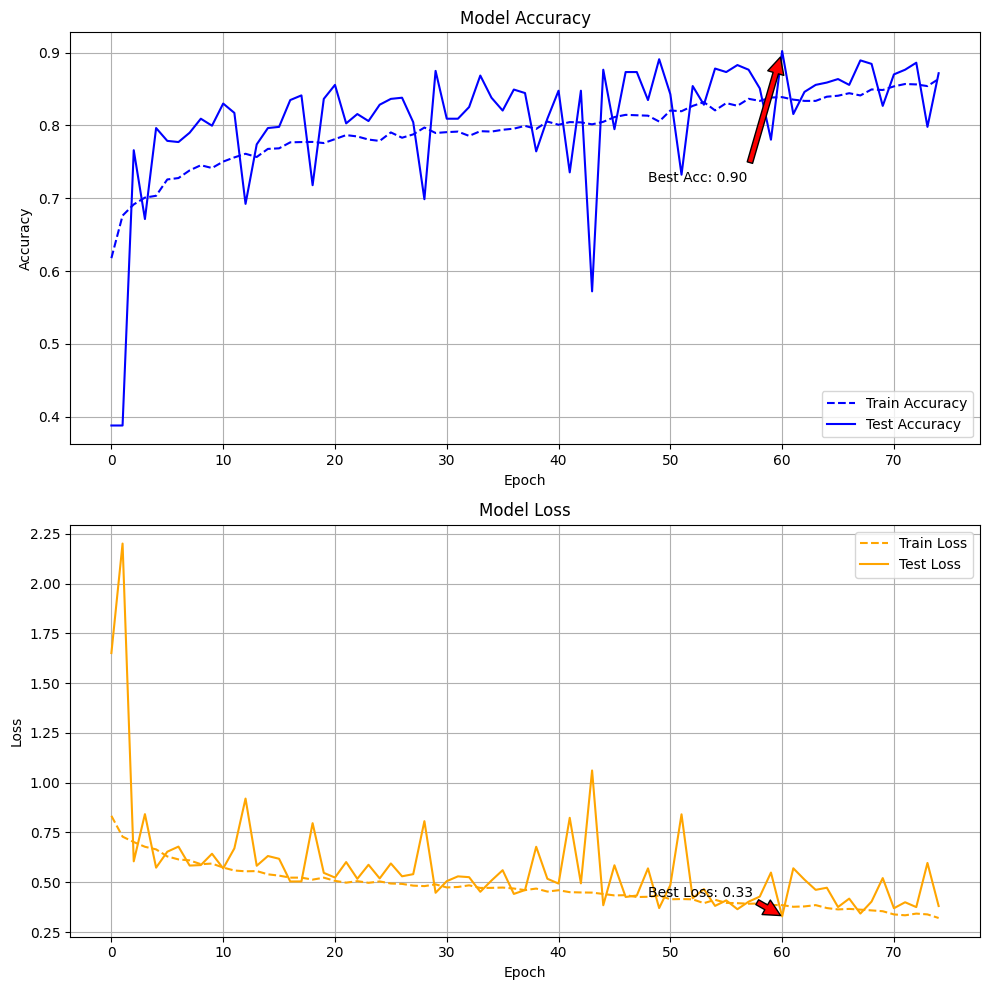

In [33]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot training & validation accuracy values
axs[0].plot(history.history['accuracy'], label='Train Accuracy', color='blue', linestyle='dashed')
axs[0].plot(history.history['val_accuracy'], label='Test Accuracy', color='blue')
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend(loc='lower right')
axs[0].grid(True)

max_val_acc = np.max(history.history['val_accuracy'])
max_val_acc_epoch = np.argmax(history.history['val_accuracy'])
axs[0].annotate(f'Best Acc: {max_val_acc:.2f}',
                xy=(max_val_acc_epoch, max_val_acc),
                xytext=(max_val_acc_epoch*0.8, max_val_acc*0.8),
                arrowprops=dict(facecolor='red', shrink=0.05))

# Plot training & validation loss values
axs[1].plot(history.history['loss'], label='Train Loss', color='orange', linestyle='dashed')
axs[1].plot(history.history['val_loss'], label='Test Loss', color='orange')
axs[1].set_title('Model Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend(loc='upper right')
axs[1].grid(True)

min_val_loss = history.history['val_loss'][max_val_acc_epoch]
min_val_loss_epoch = max_val_acc_epoch
axs[1].annotate(f'Best Loss: {min_val_loss:.2f}',
                xy=(min_val_loss_epoch, min_val_loss),
                xytext=(min_val_loss_epoch*0.8, min_val_loss*1.3),
                arrowprops=dict(facecolor='red', shrink=0.05))

fig.tight_layout()
plt.show()

# Loading Best Model

In [38]:
from keras.models import load_model
best_model = load_model('/content/covxnet128.h5')

# Best Model Performance

In [39]:
_ = best_model.evaluate(val_ds, verbose=1)

39/39 ━━━━━━━━━━━━━━━━━━━━ 17s 65ms/step - accuracy: 0.9285 - loss: 0.2546
